# **Lendal Case study**
## *Upgrad project 1*
### project by **Beng Cheong Cheong** and **Geraldine Bengsch**





# Aims of the project
This project aims to explore a loan data set to discover what makes loan recipients more likely to repay their loan. 
This notebook demonstrates our thought process and shows the reader the steps taken and the insights gathered from the data. It documents our process of becoming familiar with the data, initial exploration, initial insights and more complex visualisations. The analysis is thus conducted in stages, individual sections can be found in the table of contents (*note: TOC works in Jupyter notebook, not in github*)

## Table of Contents
* [0. Business Problem](#0-business-problem)
* [1. Data Understanding](#1-data-understanding)
* [2. Data Cleaning](#2-data-cleaning)
    * [2.1 Missing values](#21-missing-values)
    * [2.2 Converting data types and new columns](#22-converting-data-types-and-new-columns)
* [3. Data Analysis](#3-data-analysis)
    * [3.1 Steps Taken for Visualisation](#31-steps-taken-for-visualisation)
    * [3.2 Visualisations](#32-visualisations)
        * [3.2.1 Overview of loan statuses](#321-overview-of-loan-statuses)
        * [3.2.2 Loan purposes](#322-loan-purposes)
        * [3.2.3 Other categorical features](#323-other-categorical-features)
        * [3.2.4 Finding outliers](#324-finding-outliers)
        * [3.2.5 Loan statuses over the year](#325-loan-statuses-over-the-years)
        * [3.2.6 Loan amount given out](#326-loan-amount-given-out)
        * [3.2.7 Purpose for obtaining loan](#327-purpose-for-obtaining-loan)
        * [3.2.8 Interest Rates](#328-interest-rates)
        * [3.2.9 DTI](#329-dti)
        * [3.2.10 Loan terms across each category](#3210-loan-terms-across-each-category)
        * [3.2.11 Grade terms across each category](#3211-grade-terms-across-each-category)
        * [3.2.12 Correlation between numeric columns](#3212-correlation-between-numeric-columns)
* [4. Recommendations](#4-recommendations)
* [5. Appendix](#5-appendix)
    * [5.1 References](#51-references)


# 0. Business Problem

Banks and other financial companies can earn money through lending money out to their customers and the compensation of a certain interest rate. However, this assumes that the debtors will indeed repay their loan in full. A borrower may find themselves unable to make payments, meaning that the loan will default. As a result, the bank looses not only the principal amount, but also the interest on the money. Banks need to make a decision on who they lend money to. This usually occurs based on data from previous loan recipients.

The business problem is that the Lendign Club wants to know, from the dataset given to us, how we can identify and distinguish borrowers who are likely to pay off from those who are likely to default.

## The Lending Club

"Lending Club" is a US based peer-to-peer (P2P) company that connects investors with borrowers, providing both personal and business loans. It is accessible to most borrowers, but provides better terms to borrowers with high incomes and great credit scores. After applying, investors review the loan and decide on investing in it or not.
(see also https://lendingclub.com/)

![workflowpic](img/workflow.png)

# 1. Data Understanding

The first phase of the project consisted of becoming familiar with the data set. We imported the necessary libraries, read in the data set from the provided file into a data frame, and inspected it.
The data set consists of 111 columns with different data types. Not all of which are relevant for investigating types of risks associated with providing clients with a loan. In addition, a considerable amount of columns does not contain any data at all. Others have missing values or contain information that is of limited use to this project. We continued to clean and manipulate the data throughout the project to ensure that it fits the needs of the analysis. More data does not automatically lead to deeper insights. As such, we made sure to select relevant columns to analyse. This includes continuing building of data structures, such as dropping columns or creating new ones and creating purpose built new data frames by making subselections.

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import relevant additional libraries to display plotly output as png, so output is visible on github, and install if not found
try:
    import kaleido
    print("kaleido installed")
except ModuleNotFoundError:
    print("installing library")
    pip.main(['install', kaleido])

kaleido installed


In [2]:
# read data into a first data frame
loan = pd.read_csv('loan.csv')

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# see the data with all columns
pd.set_option('display.max_columns', None)
# display first five rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#display basic statistical information for the data
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Displaying the first five rows of the data and using basic statistical insights shows that the data set is too large to gain meaningful insights by attempting to understand the data without any data wrangling. 
The basic statistics show that there is a considerable varation between different factors, so that it is not particularly meaningful at this point. However, we can see that the loan amount varies between a minimum value of $500 and $35000. This means that loans are of small to medium size in the amount in the data set.

# 2. Data Cleaning
We wanted to obtain an overview to check if there are missing values present. The first check gave us the basic information that there are columns with missing values that we need to take into consideration in our process. The second step showed the total value of missing values. In the third step, we wanted to know what type of data the individual columns take. It can be noted that the output is quite long, which is why we chose to do the other steps first. As a result, the third step becomes more meaningful for us, because we already understand what we are looking for.


## 2.1 Missing values
We first analysed the data set for missing values and reconfigured the data to be in a tidy format. This took various steps as described below.

In [5]:
#check for columns with no data
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#count total number of missing values in the data DataFrame
loan.isnull().sum().sum()

2263364

In [7]:
# count columns that contain data at all 
loan.notnull().any().sum()

57

In [8]:
# Here, we want to know which data column contains which types of data so that we can decide if they should be categorical,
# numerical, ordinal variables

column_idx = 0
while column_idx <= loan.shape[1]:
    end_range = column_idx + 10
    print("-----")
    print("Printing column data types for {} to {}".format(column_idx, end_range-1))
    print("-----")
    print(loan.iloc[:,column_idx:end_range].info())
    column_idx = end_range 

-----
Printing column data types for 0 to 9
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39717 non-null  int64  
 1   member_id        39717 non-null  int64  
 2   loan_amnt        39717 non-null  int64  
 3   funded_amnt      39717 non-null  int64  
 4   funded_amnt_inv  39717 non-null  float64
 5   term             39717 non-null  object 
 6   int_rate         39717 non-null  object 
 7   installment      39717 non-null  float64
 8   grade            39717 non-null  object 
 9   sub_grade        39717 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB
None
-----
Printing column data types for 10 to 19
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------

In [9]:
#filtering list of columns that are not all empty
#here, we remove all columns that are at least 95 percent empty
cols_non_empty = loan.columns[loan.isna().sum() <= np.round(0.95 * loan.shape[0],0)]
print(list(cols_non_empty))
print("\n")
print("number of columns that are at least 95% empty: ", len(list(cols_non_empty)))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


number of columns that are at least 95% empty:  56


The data exploration shows that the amount of columns in the dataset to be analysed is not as overwhelming as initially thought: Only 56 columns contain data at all, that is about half of the columns in the data set. We continued our analysis with those non-empty columns. 

Next, we want to find out if there are any row and entries that contain many missing values, even after removing the columns that are 95% empty.

In [10]:
loan_reduced = loan[cols_non_empty]

#find out what is the maximum no of values in row that are missing
max_missing_vals = loan_reduced.isna().sum(axis=1).max()
print("Most number of missing values in a row: {}".format(max_missing_vals))
print(loan_reduced[loan_reduced.isna().sum(axis = 1) == max_missing_vals].index)

Most number of missing values in a row: 7
Int64Index([39659, 39660], dtype='int64')


In [11]:
#here we visualize the rows with the most number of missing vals
loan_reduced.iloc[[39659, 39660],:]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.0,0,May-99,1,NaN,NaN,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.0,622.49,0.0,0.0,0.0,Sep-10,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.0,0,May-99,1,NaN,NaN,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.0,391.22,0.0,0.0,0.0,Sep-10,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN



We could impute median or mean, but the columns that are missing are not the columns that we are looking to use for our analytics. Therefore, we have decided to leave the rows in the data as it is. 
For the remainder of the analysis, we created a new data frame that only contained columns which do not contain 95% and more empty columns, as described above

In [12]:
# create new data frame
df = loan[cols_non_empty]

# due to requirements of this project, we will be removing "Current" loan status from our analysis completely and focus only on paid off and charged off stauses
df = df.loc[df['loan_status']!='Current']
# we will now recode our loan status as 1 for 'Charged Off', 0 for 'Fully Paid' for easier analysis
df.loc[:,'loan_status'] = df.loc[:,'loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0).astype('str')
df['loan_status'] #display data frame to check that everything worked

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: object

In [13]:
#looping through all the columns to find out the range of values, how many unique values, and what are the data types; reason for doing so is also to find out if we need to re
for col in df.columns:
    print("{}: {} unique values".format(col,df[col].nunique()))
    print(df[col].describe())
    print("\n")

id: 38577 unique values
count    3.857700e+04
mean     6.763787e+05
std      2.092639e+05
min      5.473400e+04
25%      5.120330e+05
50%      6.564230e+05
75%      8.291460e+05
max      1.077501e+06
Name: id, dtype: float64


member_id: 38577 unique values
count    3.857700e+04
mean     8.422843e+05
std      2.644519e+05
min      7.069900e+04
25%      6.611310e+05
50%      8.392920e+05
75%      1.037336e+06
max      1.314167e+06
Name: member_id, dtype: float64


loan_amnt: 870 unique values
count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


funded_amnt: 1019 unique values
count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


funded_amnt_inv: 8050 unique values
count    3857

## 2.2 Converting data types and new columns
We observed that the interest rate column is not in numeric data type. Hence, we had to convert interest rate to numerical values. We also created new columns based on our needs.

In [14]:
# convert interest rate to numerical values
df.loc[:,'int_rate'] = df.loc[:,'int_rate'].apply(lambda x: float(x.replace("%","")) if type(x) == str else x)

# we wanted to visualise loan status over the years, so we had to create a 'year' column
df['year'] = df.loc[:,'earliest_cr_line'].apply(lambda x: x.split("-")[-1])
df['year'] = df.loc[:,'year'].astype('int').apply(lambda x: x+1900 if x>=10 else x+2000)

# 3. Data Analysis

Exploratory data analysis of the data set consisted of considerations of how to gain useful insights from the data. We found that simply working with calculations was not the best way to gain meaningful insights, mainly due to the still large number of columns that made observations not very simple. Instead, we decided to use this part to prepare the data for the last part, visualisations. This segment contains the majority of our engagement with the data. Here, we selected the columns that we wanted to work on through visualisation. We found that not all columns are relevant for our problem statement. While all of the information is relevant to the company, not all of it will impact loan risk factors [Ref1](#ref1). As a result, we chose specific columns to work on which are explained at throughout the section.


## 3.1 Steps Taken for Visualisation
Data analysis does not only consists of writing code. Instead, it implies deep understanding of the underlying data. This cannot be accomplished without understanding of the subject matter. In our case, this meant that we needed to find out more about elements in the data set that are present in the individual columns to make informed decisions about which columns to focus on.  

The following features were selected by us from our online research on the possible factors of a borrower defaulting loan payments and our engagement with the data:
 1. Overview - how many loans were charged off as comapred to fully paid
 2. Loan given out over the years broken down by statuses
 3. Loan given out categorized by percentile (low, medium, high)
 4. Interest rate (Charged Off vs Fully Paid) - to see the spread of the different data points of the interest rate
 6. DTI (Charged Off vs Fully Paid) - to see the spread of the different data points over DTI
 7. the Term (Charged Off vs Fully Paid)
 8. the Grade (Charged Off vs Fully Paid)
 9. Correlations between each of the variables


The following columns were also considered to be worked on:

`loan_amnt, pub_rec, pub_rec_bankruptcies, revol_bal, mths_since_last_delinq, purpose, delinq_2yrs, delinq_amnt, grade, subgrade, annual_inc, inq_last_6mths,total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,total_rec_late_fee, collection_recovery_fee` 
However, these columns were not included in the final analysis as we believe that the above 9 analytics would suffice for this EDA project. We would consider returning to them for a follow up project.

We also made the decision to drop the following columns with only one value although we had intentions to analyze them initially, because we anticipated their information to be valuable. However, while such data may have been useful for our project, the single values made them unusable for us.
`pymnt_plan, tax_liens, initial_list_status`

## 3.2 Visualisations
We used visualisations to understand our data better. In a first step, we decided to focus on on *fully paid* vs. *charged off* loans. While current loans are still included in some general visualisations that do not differentiate between the loan status, we decided to mainly focus on the loans that have terminated. Given that this is not a predictive data analysis, we decided to exclude *current* loans when comparing statuses.
Overall, exploratory data analysis aims to visualise and summarise the data to allow for tentative assumptions about the population.

## 3.2.1 Overview of loan statuses
We conducted a univariate analysis to understand an overview of the loan statuses. Majority of loans given out have been fully paid at 83.0%, with 14.2% of loans defaulted.

Text(0.5, 1.0, 'Paid off vs. Charged off loans in %')

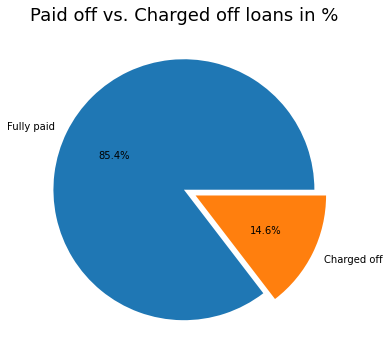

In [15]:
#Visualising the difference in % excluding 'current' loans
fig, ax = plt.subplots(figsize=(6, 6))

plt.pie(df.groupby('loan_status')['id'].count(),
        labels=['Fully paid', 'Charged off'],autopct='%.1f%%',explode=(0,0.1))

plt.title('Paid off vs. Charged off loans in %', fontsize=18)

Here we wanted to know exactly how much the lending club has lent out and how much they have lost through customers who have defaulted. This shows that reducing the amount of clients who default on their loans is of immense importance.

In [16]:
# calculating total sum vs charged off sum of loans
total_amount_loaned = df['funded_amnt_inv'].sum()
total_amount_charged = df.loc[df['loan_status']=='1']['funded_amnt_inv'].sum()

print('Total amount loaned by bank: ${:.2f}'.format(total_amount_loaned))
print('Total amount charged off: ${:.2f}'.format(total_amount_charged))
print('Proportion of amount charged-off: {:.2f}%'.format(100 * (total_amount_charged/total_amount_loaned)))

Total amount loaned by bank: $394352654.30
Total amount charged off: $61134661.49
Proportion of amount charged-off: 15.50%


While the charged off amount may "only" be about 15% of the total amount loaned out, the amount comes to over $61 Million that the bank has lost.

## 3.2.2 Loan purposes
We then wanted to know what type of loans are taken out. This was visualised as a bar chart as it is a categorical unordered univariate analysis. It clearly shows that 'debt consolidation' is by far the most common reason for our data set. We decided to also print the exact numbers separately below the chart in case we needed this information later. We chose to not include the precise numbers in the graphic as we did not feel that it was necessary to be informative. We found that 'debt consolidation' is not only a common reason to obtain a loan, but is also a reason to apply to the lending club according to their marketing (see also https://www.lendingclub.com)

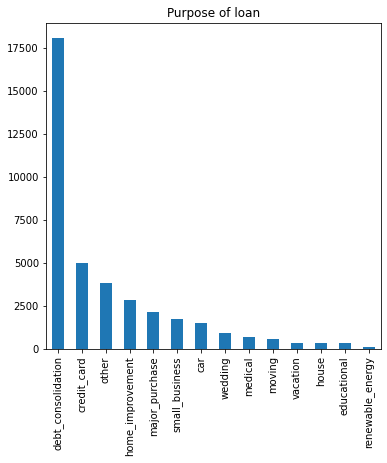

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64


In [17]:
# visualise different purposes for loan
fig, ax = plt.subplots(figsize=(6, 6))
purposeofloan=df.purpose.value_counts()
purposeofloan.plot(kind='bar')
plt.title('Purpose of loan')
plt.show()

print(purposeofloan)

Research suggests that the purpose can impact investors' funding decision. For a follow up study, we may want to consider including an analysis of the second column in the data set describing the purpose in the applicant's words [Ref2](#ref2).

## 3.2.3 Other categorical features
In the following, we wanted to compare columns with categorical values. We kept the number to under 10, so that readability of the graphs is maintained. 


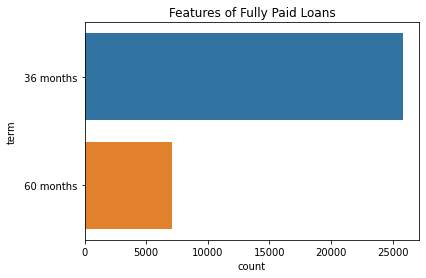

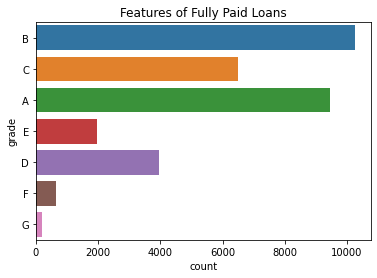

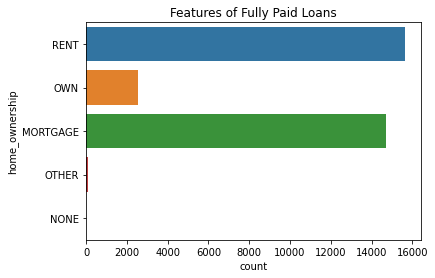

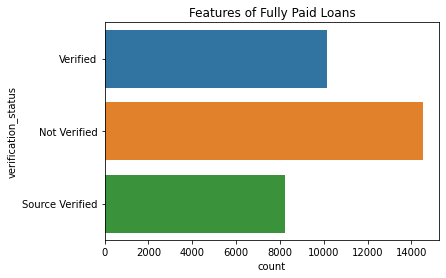

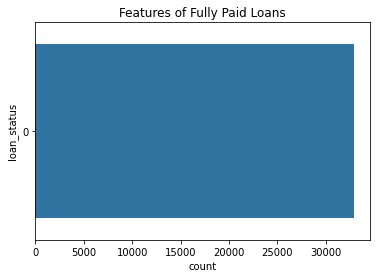

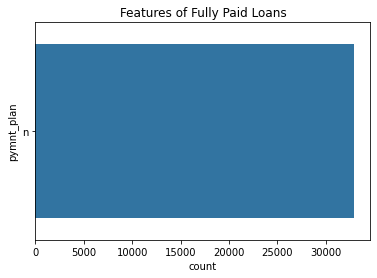

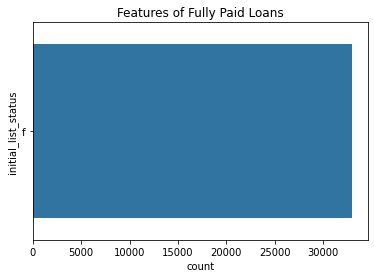

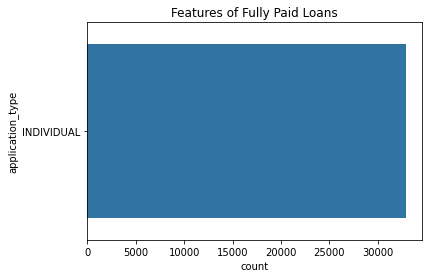

In [25]:
# plotting categorical features with less than 10 classes, to maintain readability in the visualisation: Fully paid loans
paid =df[df['loan_status']=='0']

for column in paid.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=paid)
        plt.title('Features of Fully Paid Loans')
        plt.show()

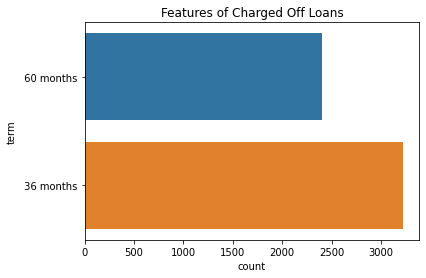

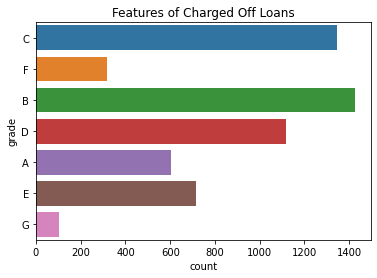

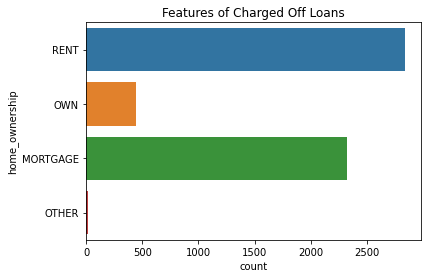

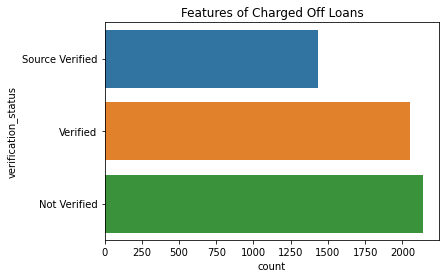

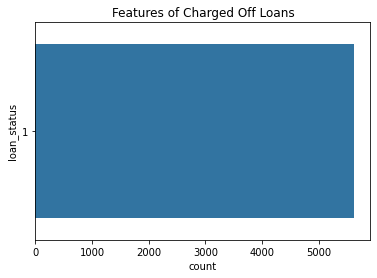

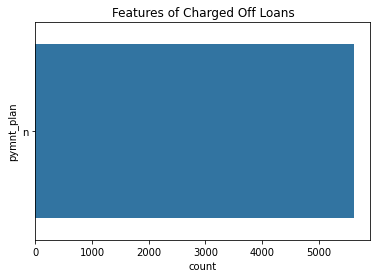

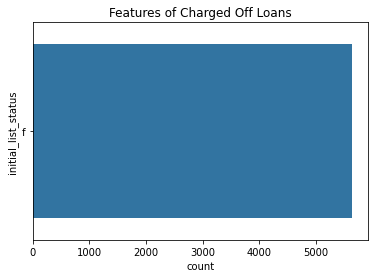

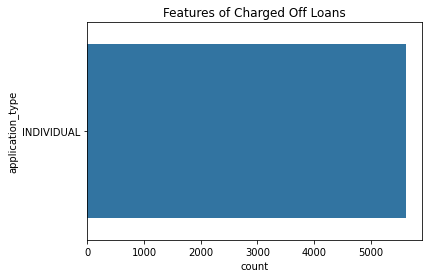

In [29]:
# plotting categorical features with less than 10 classes, to maintain readability in the visualisation
charged_off =df[df['loan_status']=='1']

for column in charged_off.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=charged_off)
        plt.title('Features of Charged Off Loans')
        plt.show()

***
### Insight into categorical values
The graphs show that most loans are 36 months in length. Individuals falling into grade A, B or C obtained the most loans. Most people rent their home or have a mortgage. Some of the latter graphs are not that useful for our analysis, but we can also see that payment plan and individual only contain a single value. As a result we later decided to not include them in the analysis.
Overall, it can be noted that loan characteristics in the Lending Club data are similar to other financial loan situations: Loan purpose and amount and borrower characteristics, including housing contribute to factors in the analysis [Ref1](#ref1).
***

## 3.2.4 Finding outliers
In the following, we wanted to see if there are outliers in the data. As can be seen, this seems to only be the case for annual income. However, when we plot the distribution, we can see that there are actually not many outliers. We will keep this in mind for the later correlation analysis.

<AxesSubplot:>

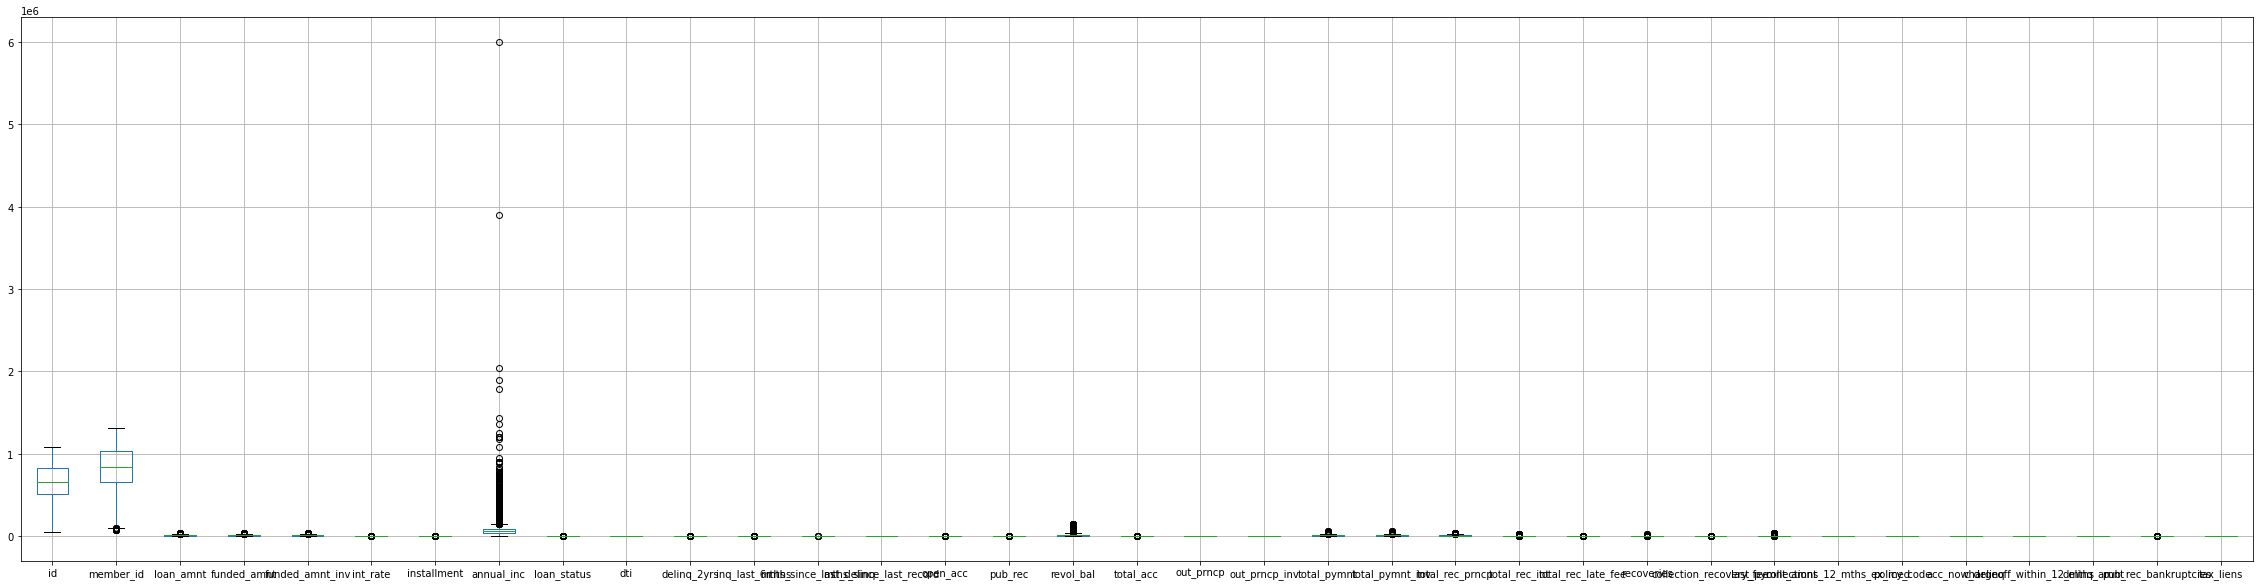

In [ ]:
#generate boxplot
df.select_dtypes(exclude=['object']).boxplot(figsize=(40,10))

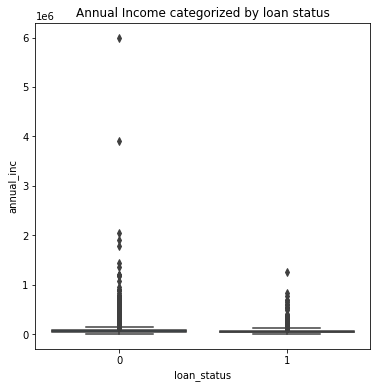

In [ ]:
# plot distribution for annual income
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="annual_inc", data=df)
plt.title("Annual Income categorized by loan status")
plt.show()

***
### Insights for annual income
Annual income varies considerable across the data. However, this is not surprising, given that the Lending Club encourages anyone to apply for a loan, regardless of income. Instead, we will later see the importance of a related variable, debt-to-income-ratio as a factor (see also https://www.lendingclub.com/)
*** 

## 3.2.5 Loan statuses over the years
We then conducted a bivariate analysis to look at the loans given out every year and categorized them by the categories. As we examined the loans given out the years, the majority of loans came in the early 2000s. 
Notably, even in the early 2000s, the proportion of loans that were fully-paid or charged off remained largely the same. We will discuss this further.

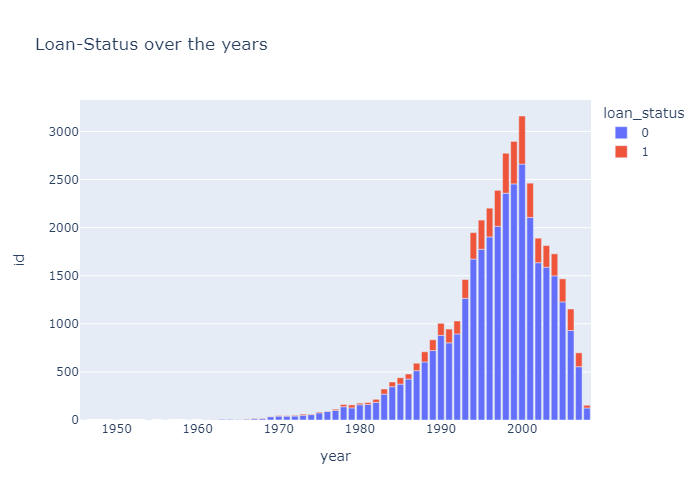

In [ ]:
df_year = df.groupby(['year','loan_status']).agg({'id':'count'}).reset_index()

fig = px.bar(df_year, x="year", y="id", color="loan_status", title="Loan-Status over the years")
fig.show('png')

---
### Insights for loans over the years 
We found it quite interesting that the amount of loans given out was highest in the early 2000s. We found out that rates for loans were very low then. This allowed more people to take out loans with relatively low monthly payments. We discovered that this behaviour of extensive borrowing and flawed financial modelling was going to lead to the mortgage crisis of 2008.


(see also https://www.thebalance.com/mortgage-crisis-overview-315684)
***


## 3.2.6 Loan amount given out
A univariate analysis and a histogram were constructed to understand the range of loan amount given out. The majority of the loans that were given out are below $10,000. We then categorized the loan amount by breaking down the loan into loans from 0th to 25th percentile, 25th percentile to 75th percentile and above 75th percentile and grouped them as 'low', 'medium' and 'high'.

<AxesSubplot:title={'center':'Loan amount given out'}, xlabel='loan_amnt', ylabel='Count'>

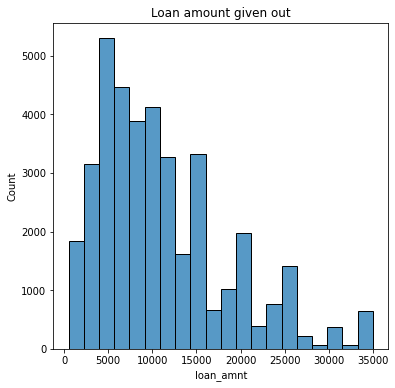

In [ ]:
# display loan amount
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Loan amount given out')
sns.histplot(data=df, x="loan_amnt", bins=20)

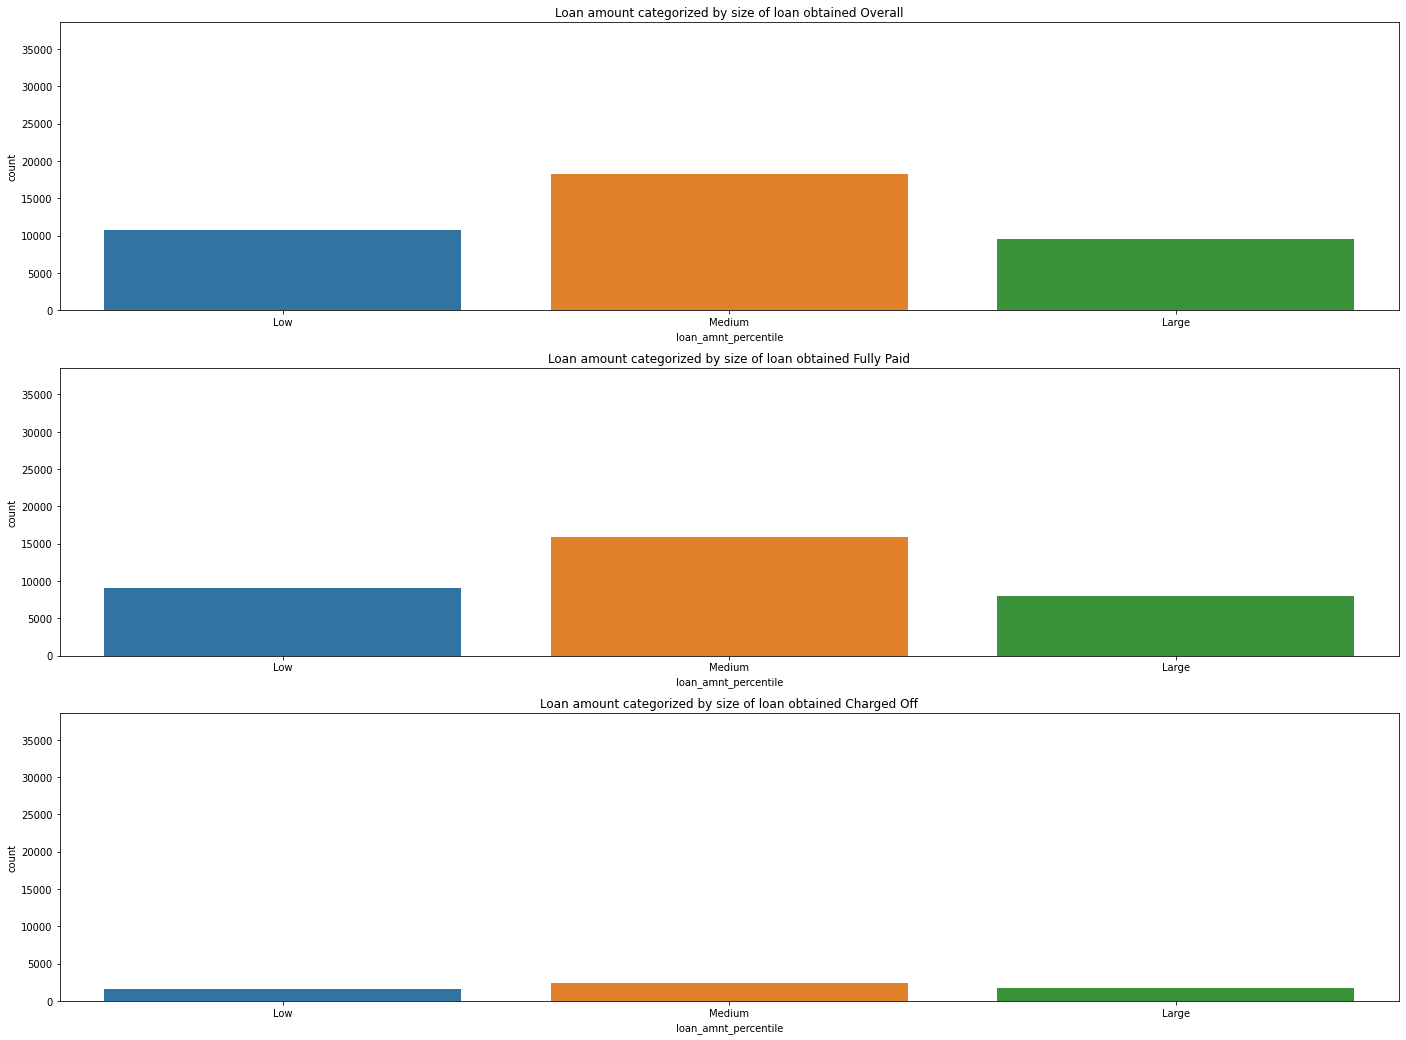

In [ ]:
#we are dividing loan amount by each cutoff point at each percentile - 25th and below, 25th to 75th and 75th and above
df.loc[:,'loan_amnt_percentile'] = pd.qcut(df.loc[:,'funded_amnt_inv'],[0,.25,.75,1], labels=['Low','Medium','Large'])  

fig, (ax_overall, ax1,ax2) = plt.subplots(3, figsize=(24, 18))

sns.countplot(x='loan_amnt_percentile', data=df, ax=ax_overall)
ax_overall.set(ylim=(0,df.shape[0]))
ax_overall.title.set_text("Loan amount categorized by size of loan obtained Overall")

sns.countplot(x='loan_amnt_percentile', data=df.loc[df['loan_status']=='0'], ax=ax1)
ax1.set(ylim=(0,df.shape[0]))
ax1.title.set_text("Loan amount categorized by size of loan obtained Fully Paid")

sns.countplot(x='loan_amnt_percentile', data=df.loc[df['loan_status']=='1'], ax=ax2)
ax2.set(ylim=(0,df.shape[0]))
ax2.title.set_text("Loan amount categorized by size of loan obtained Charged Off")

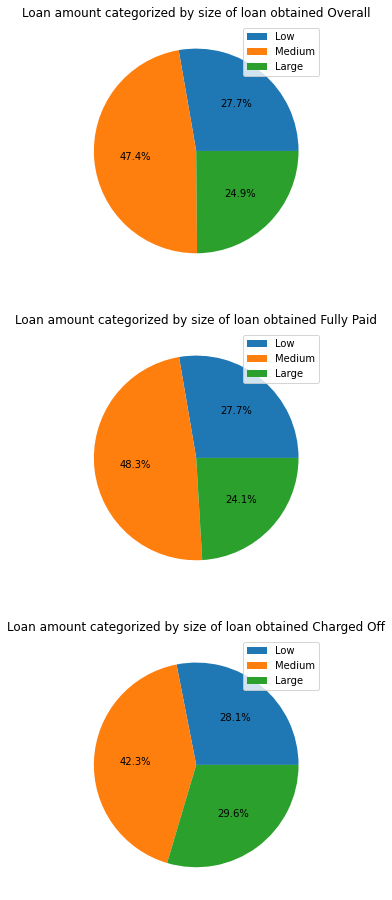

In [ ]:
fig, (ax_overall, ax1,ax2) = plt.subplots(3, figsize=(24, 16))
labels = ['Low','Medium','Large']

df_percentile = df.groupby('loan_amnt_percentile').agg({'id':'count'}).unstack()
ax_overall.pie(x=df_percentile, autopct='%.1f%%')
ax_overall.legend(labels)
ax_overall.title.set_text("Loan amount categorized by size of loan obtained Overall")

df_percentile_fully_paid = df.loc[df['loan_status']=='0'].groupby('loan_amnt_percentile').agg({'id':'count'}).unstack()
ax1.pie(x=df_percentile_fully_paid,autopct='%.1f%%')
ax1.legend(labels)
ax1.title.set_text("Loan amount categorized by size of loan obtained Fully Paid")

df_percentile_charged_off = df.loc[df['loan_status']=='1'].groupby('loan_amnt_percentile').agg({'id':'count'}).unstack()
ax2.pie(x=df_percentile_charged_off, autopct='%.1f%%')
ax2.legend(labels)
ax2.title.set_text("Loan amount categorized by size of loan obtained Charged Off")

***
### Insights for size of loan
Most commonly, borrowers request and receive a medium loan. As a result, the ratio between loans that are fully paid and charged off is not very large.
Loan size has been extensively discussed in academic literature, but with varying conclusions. There is some argument that risk of default grows as the loan amount increases, but other findings suggest the opposite. It thus might be a good strategy to fund medium sized loans [Ref1](#ref1).

***

***
### Insights for actual loan amount received (funded_amnt_inv)

***

## 3.2.7 Purpose for obtaining loan
Next, we conducted a bivariate analysis on the purpose of the loans. We decided to revisit the univariate analysis of the loan purpose conducted earlier, because we had now new insights into the different categories. When we examined the purpose given for obtaining the loans, the majority of borrowers in each of the three categories borrowed it for the reason "Debt Consolidation". 

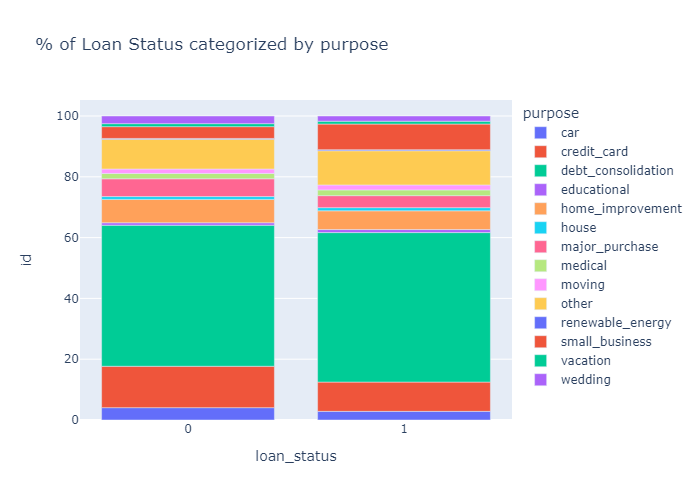

In [ ]:
#visualise loan status by purpose using a stacked bar cahrt
df_purpose = df.groupby(['loan_status','purpose']).count()['id']
df_purpose = df_purpose.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
fig = px.bar(df_purpose, x="loan_status", y="id", color="purpose", title="% of Loan Status categorized by purpose")
fig.show('png')

---
### Insights for purpose
We found it very interesting that the primary reason to take out a loan was for 'debt consolidation'. We found out that it is not just a primary reason in our data set, but generally the most likely reason. This was also true for the other reasons. As such the data set appears to be a valid data set that mimics behaviours of others we may analyse. This is important, because it means that we can generalise to some degree from our data sample to the general population. We discovered that 'debt consolidation' is generally considered an acceptable reason to take out a personal loan. A personal loan is considered a rather inexpensive borrowing option, especially for smaller amounts that are to be repaid within a reasonably short timeframe (usually up to 60 months). Debt consolidation may offer the borrower a more manageable way of loan repayment. [Ref1](#ref1)


(see also https://www.investopedia.com/articles/personal-finance/111715/when-are-personal-loans-good-idea.asp)
***


## 3.2.8 Interest Rates
### Level of interest-rate when first obtaining loans
However, when we looked at the level of interest-rate when the loans were first being obtained through univariate analysis, we can see that those who were able to pay back fully obtained at the much lower median interest-rate, and even the interest-rate at 75th-percentile was around the same as the median of those who were charged off.

Text(0.5, 1.0, 'Interest rate categorized by loan status')

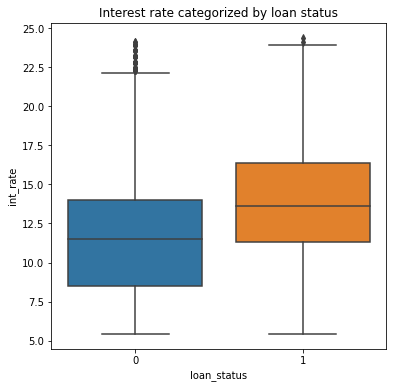

In [ ]:
df.loc[:,'int_rate'] = df.loc[:,'int_rate'].apply(lambda x: float(x.replace("%","")) if type(x) == str else x)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.title("Interest rate categorized by loan status")

***
### Insights for Interest rates
Median Interest-rates higher for charged off loan status. If rates are too high or increase too much, it may become difficult for the borrower to keep up with their payment, increasing the risk of default. However, higher interest rates will pay more to the investor which is also of interest to the Lending Club.

(see also https://www.sciencedirect.com/topics/economics-econometrics-and-finance/interest-rate)
***

## 3.2.9 DTI
### Level of DTI when first obtaining loans
However, when we looked at the level of DTI (debt-to-income ratio) when the loans were first being obtained, we can see that those who were able to pay back fully obtained at the much lower median DTI than those who were charged off.

Text(0.5, 1.0, 'DTI categorized by loan status')

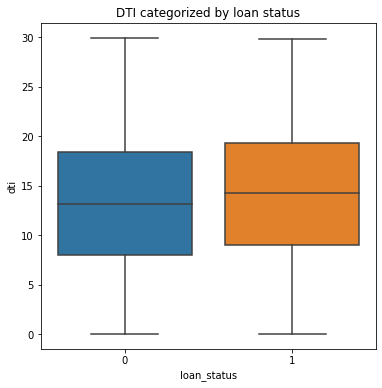

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="dti", data=df)
plt.title("DTI categorized by loan status")

***
### Insights for DTI
Median DTI higher for charged off loan status. This is reflected in other reports as well. Lenders prefer lower DTI ratio, as it is a sign of a good balance between debt and a borrower's income. If the DTI is too high, the debt can become unmanageable, because the borrower is left with limited money. Unforseen events may cause a borrower to become unable to keep up with their debt payments then. 
(see also https://www.investopedia.com/terms/d/dti.asp)

***

# 3.2.10 Loan terms across each category
When we observed the loan terms, a higher proportion of loan terms that were fully paid belonged were 36 months in total. 
An almost equal proportion of loan terms that were charged off. 

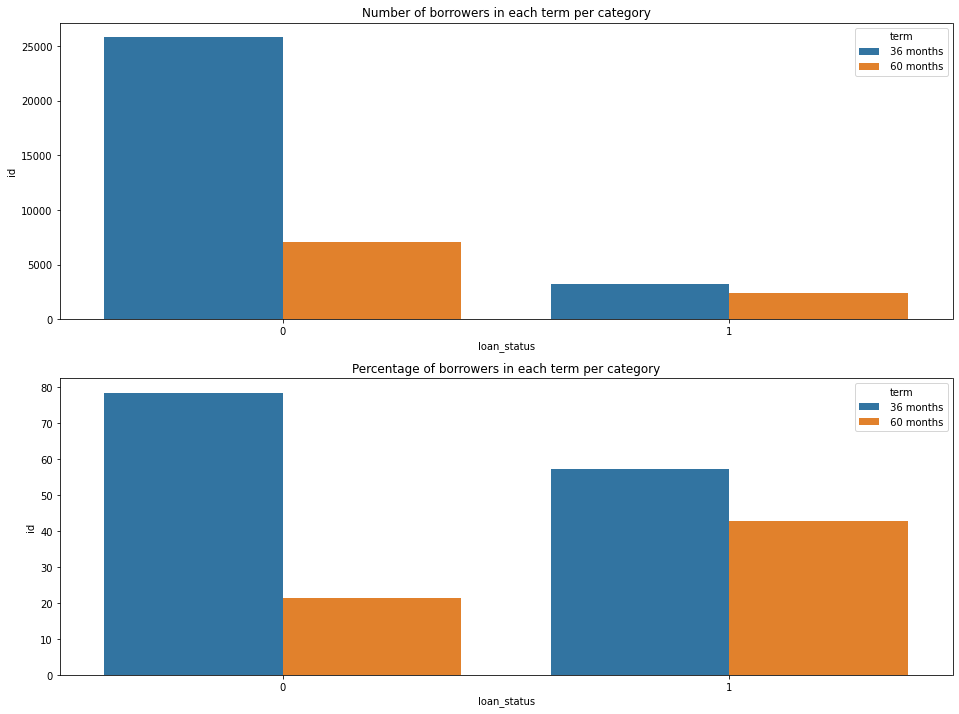

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(16, 12))
df_term = df.groupby(['loan_status','term']).count()['id']
ax1.title.set_text("Number of borrowers in each term per category")
sns.barplot(x='loan_status', y='id', hue='term', data=df_term.reset_index(), ax=ax1)

df_term_perc = df_term.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
ax2.title.set_text("Percentage of borrowers in each term per category")
sns.barplot(x='loan_status', y='id', hue='term', data=df_term_perc, ax=ax2)
plt.show()

***
### Insights for loan terms
Higher proportion of loan terms that were charged off belong to '36 months' loan term. Offering to extend the term and thus reduce the borrower's monthly payments may lead to customers being able to pay off their loan. Allowing customers to defer a payment may also help them to keep up with their payments. For some clients, late fees may also contribute to defaulting on their loan. However, we will see in the correlation analysis later that this is not the case for this data set.

(see also https://economictimes.indiatimes.com/wealth/borrow/car-loan-default-what-when-and-how/articleshow/5089727.cms)

***

## 3.2.11 Grade across each category
When we observed the grades, there was a higher proportion of fully paid borrowers that were in Grades A and B, lower from Grade E to G.
However, when we were observing the grades for 'charged off' borrowers, there were lower proportions of borrowers in Grades A and B.

*Rate information*
Lending Club’s interest rates are calculated based on credit risk and market conditions. The final interest rate for each loan grade is calculated like this: Lending Club Base Rate + Adjustment for Risk & Volatility
(see also https://www.lendingclub.com/foliofn/rateDetail.action)

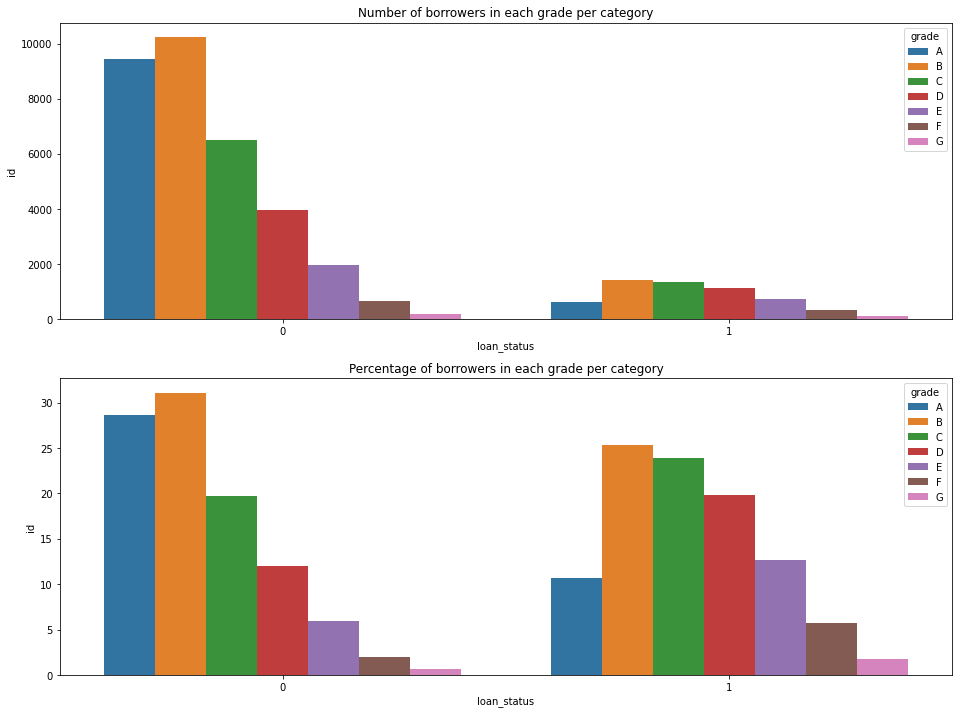

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(16, 12))
df_grade= df.groupby(['loan_status','grade']).count()['id']
ax1.title.set_text("Number of borrowers in each grade per category")
sns.barplot(x='loan_status', y='id', hue='grade', data=df_grade.reset_index(), ax=ax1)

df_grade_perc = df_grade.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
ax2.title.set_text("Percentage of borrowers in each grade per category")
sns.barplot(x='loan_status', y='id', hue='grade', data=df_grade_perc, ax=ax2)
plt.show()

***
### Insights for grade
Higher proportion of loan terms that were charged off belong to grade C and below. Grade calculations can be seen as a key variable in loan defaulting behaviour [Ref1](#ref1).
***

## 3.2.12 Correlation between numeric columns
We also observe if there are any correlation between any of the numeric columns. This is to understand if we can observe any correlations between the different loan statuses.

In [ ]:
# extract all columns from the data set with numeric values
numeric_cols = []
for col in df.columns[2:]:
    if (df[col].nunique()>100) & (df[col].dtype == np.float or df[col].dtype == np.int):
        numeric_cols.append(col)
print(numeric_cols)

['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'mths_since_last_record', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']


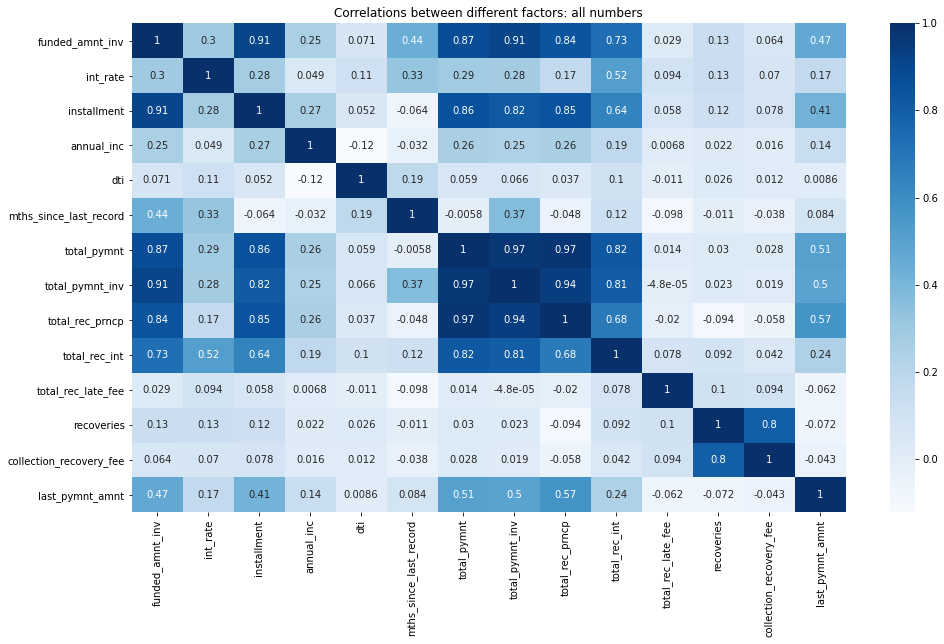

In [ ]:
#show heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df[numeric_cols].corr(),cmap='Blues', annot=True)
title='Correlations between different factors: all numbers'
plt.title(title)
plt.show()

This first heatmap shows correlations between all possible factors. As mentioned earlier, not all of the numeric columns are necessarily relevant to our analysis. As a result, we chose to refine the heatmap to only include columns that were of interest to our problem statement.

In [ ]:
#establish correlations
# columns that we picked based on our knowledge of the data and our research into the sector
possible_columns=['funded_amnt_inv','annual_inc', 'total_pymnt', 'funded_amnt_inv',
                  'int_rate', 'dti',
                'installment','total_rec_prncp', 'total_rec_late_fee']

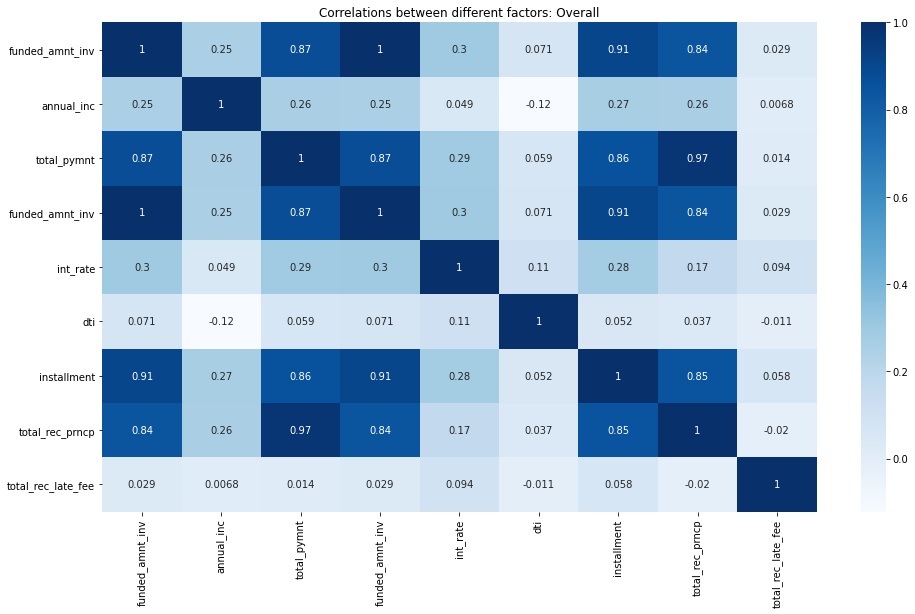

In [ ]:
#show heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df[possible_columns].corr(),cmap='Blues',annot=True)
plt.title('Correlations between different factors: Overall')
plt.show()

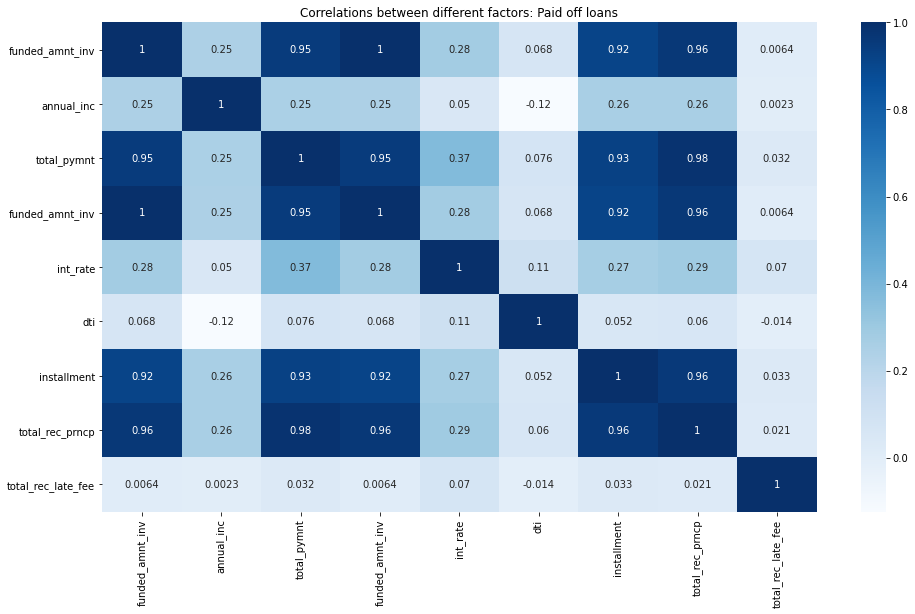

In [ ]:
#show heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df[df['loan_status']=='0'][possible_columns].corr(),cmap='Blues',annot=True)
plt.title('Correlations between different factors: Paid off loans')
plt.show()

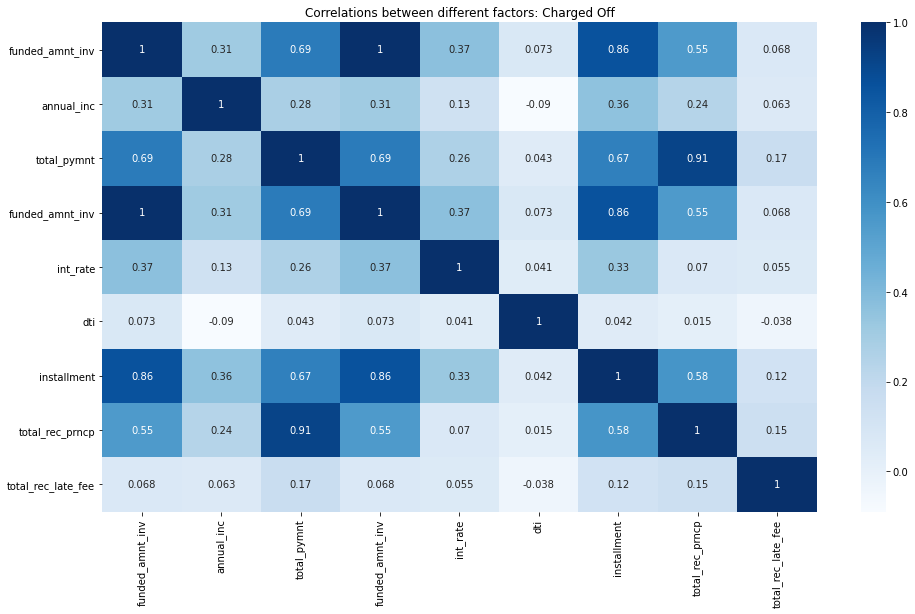

In [ ]:
#show heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df[df['loan_status']=='1'][possible_columns].corr(),cmap='Blues',annot=True)
plt.title('Correlations between different factors: Charged Off')
plt.show()

***
### *Insights from the heatmaps*
From the above heatmap, we conclude on the following:
1. For fully paid off loans, there is a strong correlation of `total_pyment` and `funded_amnt_inv`, whereas the correlation was weaker on charged off loans. This indicates that fully paid off loans are likely to receive support from investors, as the larger the amount of payment in total, the higher the amount of funded amount came from investors, and this is a good sign as this shows that there were investors willing to help out in the repayment.

2. For fully paid off loans, there is a strong correlation of `loan_amnt` and `total_rec_prncp`, whereas the correlation was weaker on charged off loans. This could lead us to believe that for those who were charged, more of the payment would go to pay off the loan payment incurred by higher interest rates than the principal loan amount.

3. There is also a strong correlation of `funded_amnt_inv` and `total_rec_prncp`, whereas the correlation was weaker on charged off loans. This tells us when investors were willing to help out and put in more money, the principal amount of loan is more likely to be paid off. 
***

# 4. Recommendations
 We came up with several recommendations based on the data that we have analyzed.

1. Purpose of the loan  does not matter. Borrowers are still as likely to pay off their loan, even when  borrowing to consoldiate current loans.
2. Borrowers were **more likely to default on their loans if interest rates at time of borrowing were high**. The lending club should be more cautious in lending out money during periods of high interest rates.
3. Borrowers were also **more likely to default when term was 60 months and they were below Grade B**. The lending club should look to cut down on the number of loans that are 60 months in term length.
4. The amount of funds provided by investors is an import factor, as those whose who were **able to pay off fully had help from investors**
5. **Annual income is not an indicator** of whether the loan will be paid.

# 5. Appendix
Here is the code for simplified visualisations that are used in the presentation

In [26]:
# columns that we picked based on our knowledge of the data and our research into the sector
simple_col=['total_pymnt','loan_amnt', 'funded_amnt_inv','total_rec_prncp' ,'annual_inc' ]

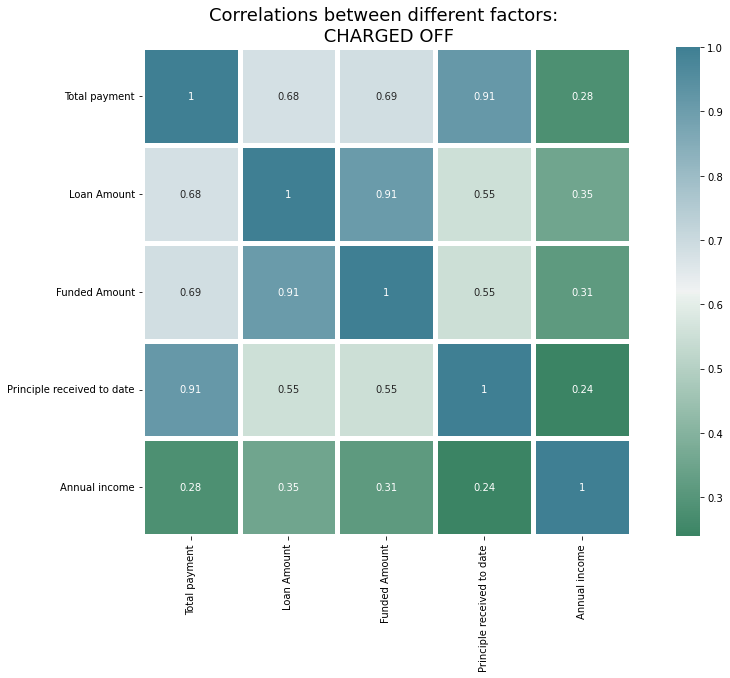

In [32]:
#relabel x and y labels
x_labels=['Total payment', 'Loan Amount', 'Funded Amount', 'Principle received to date', 'Annual income']
y_labels=['Total payment', 'Loan Amount', 'Funded Amount', 'Principle received to date', 'Annual income']
# change colour palette
cmap = sns.diverging_palette(150,220, as_cmap=True)
#set size 
plt.figure(figsize=(16,9))
#show heatmap
sns.heatmap(df[df['loan_status']=='1'][simple_col].corr(),cmap=cmap,annot=True, linewidths=5, square=True, xticklabels = x_labels, yticklabels = y_labels)
plt.yticks(rotation=0)
plt.title('Correlations between different factors: \n CHARGED OFF', fontsize=18)
plt.show()

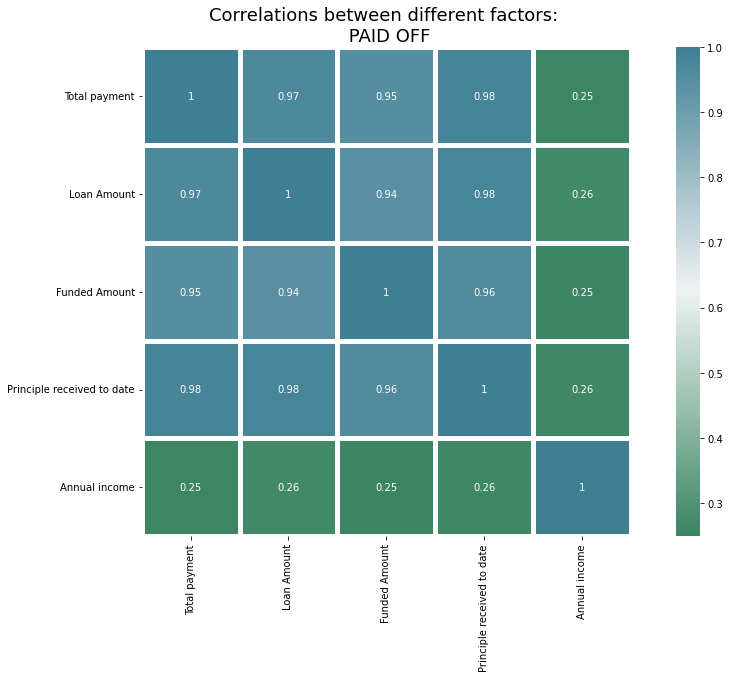

In [31]:
#show heatmap
plt.figure(figsize=(16,9))
# color map
cmap = sns.diverging_palette(150,220, as_cmap=True)
sns.heatmap(df[df['loan_status']=='0'][simple_col].corr(),cmap=cmap,annot=True, linewidths=5, square=True, xticklabels = x_labels, yticklabels = y_labels)
plt.yticks(rotation=0)
plt.title('Correlations between different factors: \n PAID OFF', fontsize=18)
plt.show()

## 5.1 References


##### *Ref1*: 
Serrano-Cinca, C., Gutiérrez-Nieto, B., & López-Palacios, L. (2015). Determinants of Default in P2P Lending. PloS one, 10(10), e0139427. https://doi.org/10.1371/journal.pone.0139427 


##### *Ref2*: 
Nowak, A., Ross, A., & Yencha, C. (2018). Small business borrowing and peer‐to‐peer lending: evidence from lending club. Contemporary Economic Policy, 36(2), 318-336, http://busecon.wvu.edu/phd_economics/pdf/15-28.pdf.